# Exploratory Data Analysis (EDA),  Data Preprocessing:

In [1]:
import warnings
warnings.filterwarnings('ignore')  # use to avoid warning in the code

In [2]:
import pandas as pd # import pandas lib using it's short form 

In [3]:
train_data = pd.read_csv(r'Titanic_train.csv',index_col = 0, header =0) # read the training data & make 0th column as index column, 0th row as header

In [4]:
train_data.head() # display top 5 rows

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv(r'Titanic_test.csv',index_col = 0, header=0) # read the testing data & make 0th column as index column, 0th row as header 

In [6]:
test_data.head() #display top 5 rows

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_data.columns  # display all the columns of train_data

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
test_data.columns   # display all the columns of test_data

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

# Brief information about the given dataset
Now, we have understood that in train_data, Survived column is the Y-parameter i.e. based on the parameters: Pclass, Name, Sex,........, Embarked we have to predict whether the passenger is survived or not.

Survived column has 2 values either 0 or 1 which means it's a case of binary classification. The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 

train_data is my past data whereas test_data is my current data. We just need to run the ML algorithm(Light GBM/XG Boost) on past data, test our model performance on past data and then predict the list of passengers from the current data, who are survived or not

In [9]:
train_data.info() # gives information about null values and data type of each and every column of training data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
test_data.info() # gives information about null values and data type of each and every column of testing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [11]:
train_data.dtypes  # data type of each column of training data

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [12]:
test_data.dtypes # data type of each column of testing data

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [13]:
train_data.shape # display no of rows & columns in training data

(891, 11)

In [14]:
test_data.shape # display no of rows & columns in testing data

(418, 10)

In [15]:
train_data[train_data.duplicated()]  #print duplicated rows in training data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


it means, there is no duplicated row in training data

In [16]:
test_data[test_data.duplicated()]  # print duplicated rows in testing data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


it means, there is no duplicated row in testing data

In [17]:
train_data.isnull().sum() # no of null values in each column of training data

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [18]:
test_data.isnull().sum() # no of null values in each column  of testing data

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

# we can treat null values using Imputation technique.
Imputation technique is used for replacing the missing data with some substitute values to retain most of the data/information of the dataset. These substitute values can be either mean, median or mode.

we can treat null values of columns: Age, Cabin for training and testing data using mode

In [19]:
train_data['Age'].mode() # calculate mode of Age column for training data

0    24.0
Name: Age, dtype: float64

In [20]:
train_data['Cabin'].mode()  # calculate mode of Cabin column for training data

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [21]:
test_data['Age'].mode() # calculate mode of Age column for testing data

0    21.0
1    24.0
Name: Age, dtype: float64

In [22]:
test_data['Cabin'].mode() # calculate mode of Cabin column for testing data

0    B57 B59 B63 B66
Name: Cabin, dtype: object

In [23]:
for x in ['Age','Cabin']:  #x can be any column like Age, Cabin
    train_data[x].fillna(train_data[x].mode()[0], inplace = True) #fill missing values of these columns(for training data) with mode
    test_data[x].fillna(test_data[x].mode()[0], inplace = True) #fill missing values of these columns(for testing data) with mode
    

In [24]:
train_data.isnull().sum() # we can see no. of null values in columns Age, Cabin are 0  (for training data)

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [25]:
test_data.isnull().sum() # we can see no. of null values in columns Age, Cabin are 0 (for testing data)

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Cabin       0
Embarked    0
dtype: int64

In [26]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True) #fill categorical missing data in Embarked column with mode (for training data)

In [27]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace = True) #fill numerical missing data in Fare column with mean (for testing data)

In [28]:
train_data.isnull().sum() # there is no null value in our training data

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [29]:
test_data.isnull().sum() # there is no null value in our testing data

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# we will plot histogram, boxplot, scatterplot for numerical column whereas plot bar graph for categorical column

# Let's first visualize the training data

In [30]:
train_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

# Boxplot

In [31]:
import matplotlib.pyplot as plt #boxplot function is available in this lib 

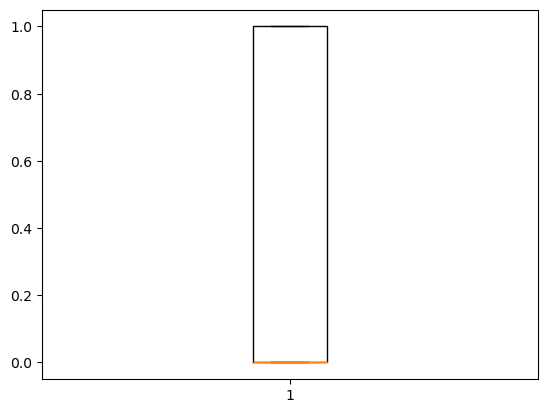

In [32]:
plt.boxplot(train_data['Survived']) #plot boxplot for Survived column
plt.show()

Range of Survived: 0.0 - 1.0. Normally distributed data i.e. no outlier in the data. IQR(Inter Quartile Range) = 1.0 - 0.0 = 1.0

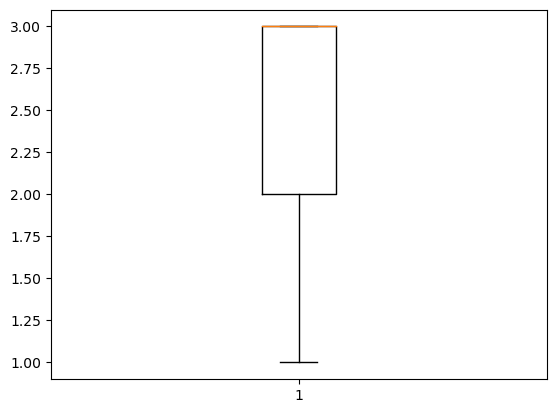

In [33]:
plt.boxplot(train_data['Pclass']) 
plt.show()

Range of Pclass: 1.00 - 3.00. Normally distributed data i.e. no outlier in the data. IQR(Inter Quartile Range) = 3.00 - 2.00 = 1.00

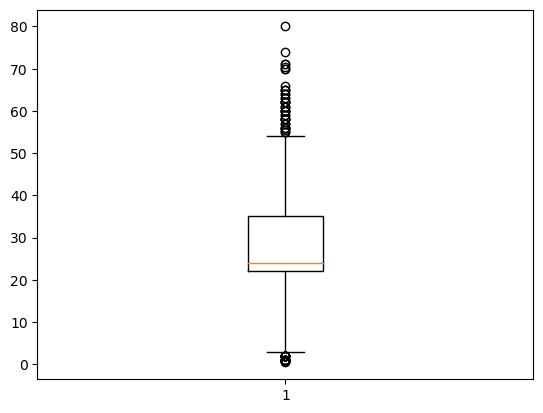

In [34]:
plt.boxplot(train_data['Age'])
plt.show()

Range of Age: 0-80. Right skewed data. IQR(Inter Quartile Range) = 35-25=10 (approx). Range from 0-1 & 55-75 is very dense, so, we should not consider them as outliers else we may lose some valuable information from the dataset. Range from 78-80 : 1 outlier and we can remove it from the dataset

# Treat outlier in column Age: only one point at 80

In [35]:
train_data.drop(train_data[train_data['Age'] > 78].index,axis=0,inplace=True) # remove one outlier above 78

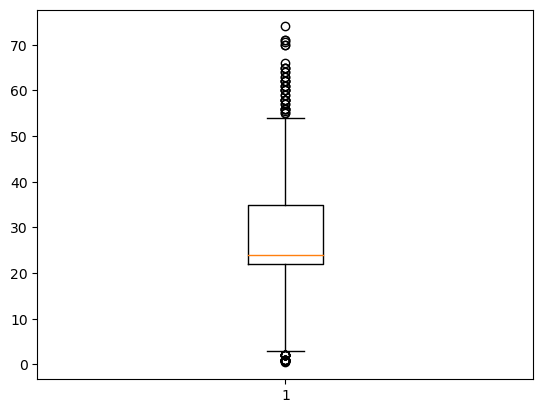

In [36]:
plt.boxplot(train_data['Age']) # one outlier above 78 has been removed now
plt.show()

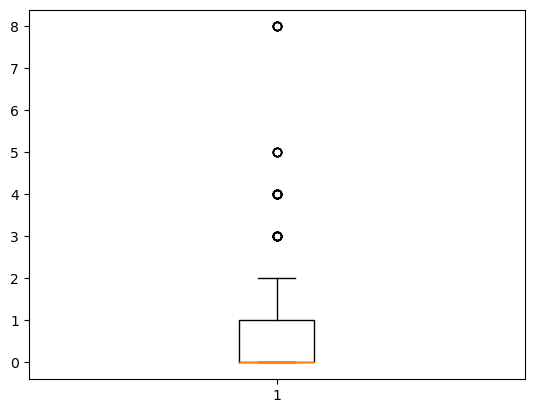

In [37]:
plt.boxplot(train_data['SibSp'])
plt.show()

Range of SibSp: 0-8. Right skewed data. IQR(Inter Quartile Range) = 1-0 = 1. Range from 3-5: 3 outliers but still they are relatively closer as compared to the one outlier at 8. So, we should remove outlier given at 8

# Treat outlier in column SibSp: only one point at 8

In [38]:
train_data.drop(train_data[train_data['SibSp'] > 7].index,axis=0,inplace=True) # remove one outlier above 7

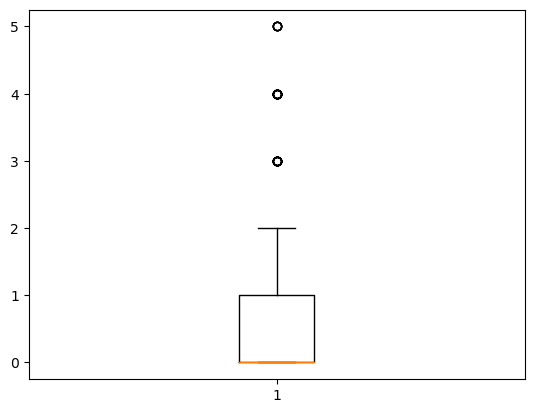

In [39]:
plt.boxplot(train_data['SibSp']) # one outlier above 7 has been removed now 
plt.show()

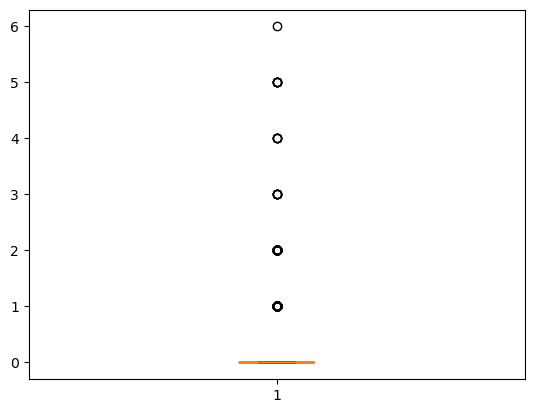

In [40]:
plt.boxplot(train_data['Parch'])
plt.show()

Range of Parch: 0-6. Right skewed data. IQR(Inter Quartile Range) = 0 . Range from 1-6: 6 outliers, however all these values can be possible, so, we are not considering them as outliers

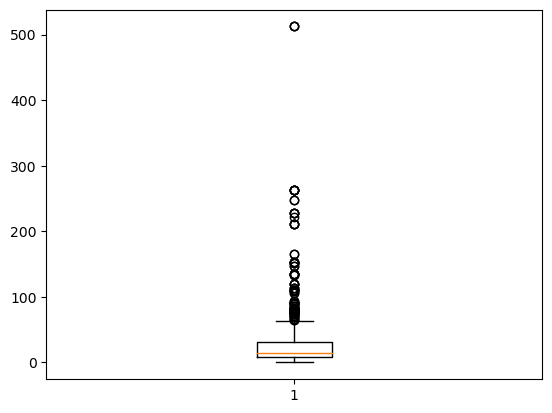

In [41]:
plt.boxplot(train_data['Fare'])
plt.show()

Range of Fare: 0-500. Right skewed data. IQR(Inter Quartile Range) = 1-0 = 1 (approx) . Range from 70-300 is very dense , so, can't be considered as outliers. There is one outlier above 500 which should be removed from the dataset

# Treat outlier in column Fare: only one point above 500

In [42]:
train_data.drop(train_data[train_data['Fare'] > 500].index,axis=0,inplace=True) # remove one outlier above 500

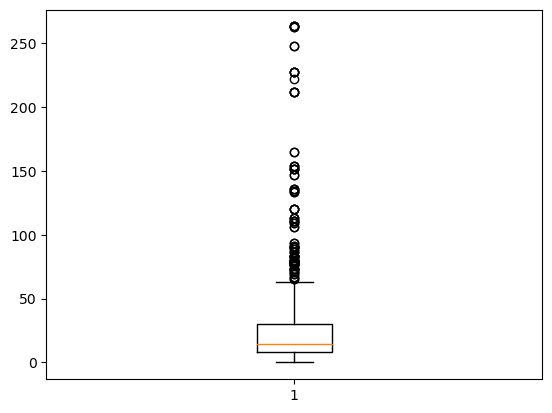

In [43]:
plt.boxplot(train_data['Fare']) # one outlier above 500 has been removed now 
plt.show()

# Histogram

<AxesSubplot:>

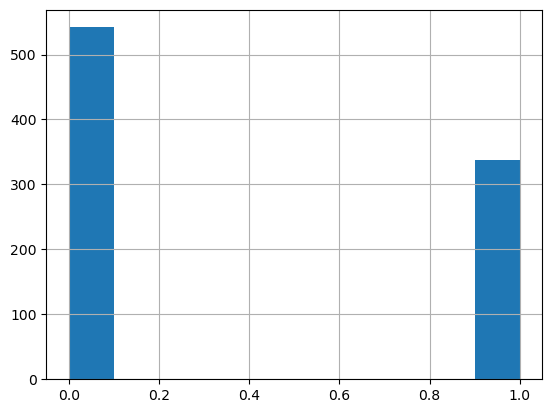

In [44]:
train_data['Survived'].hist() #plot histogram 

<AxesSubplot:>

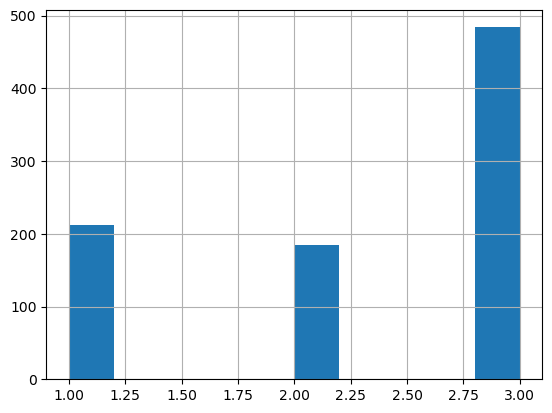

In [45]:
train_data['Pclass'].hist()

<AxesSubplot:>

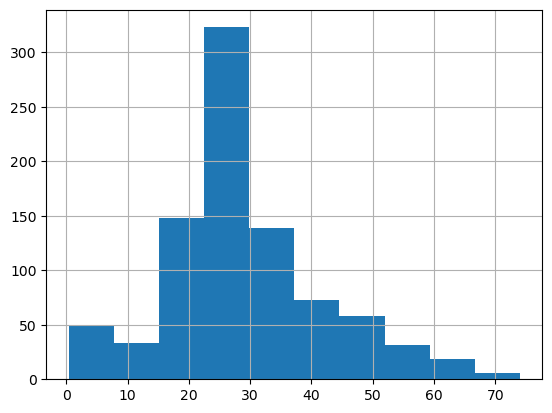

In [46]:
train_data['Age'].hist()

<AxesSubplot:>

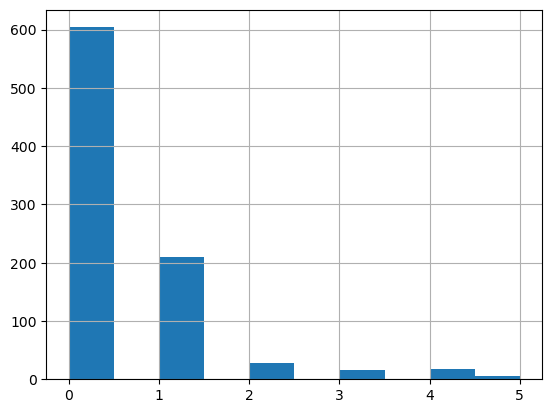

In [47]:
train_data['SibSp'].hist()

<AxesSubplot:>

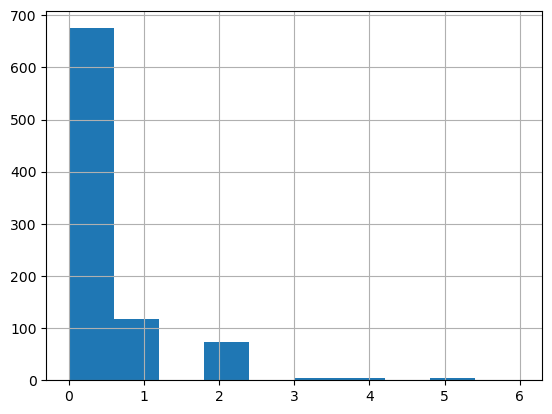

In [48]:
train_data['Parch'].hist()

<AxesSubplot:>

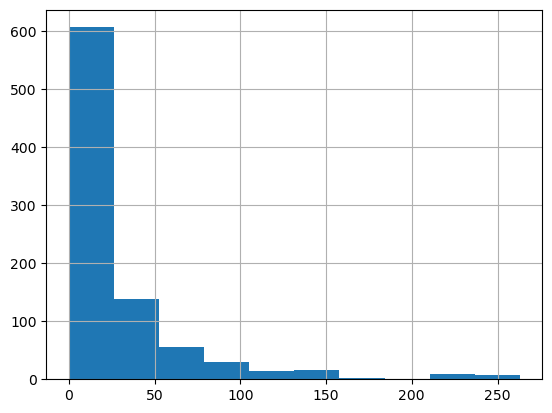

In [49]:
train_data['Fare'].hist()

# Scatterplot

In [50]:
import seaborn as sns

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

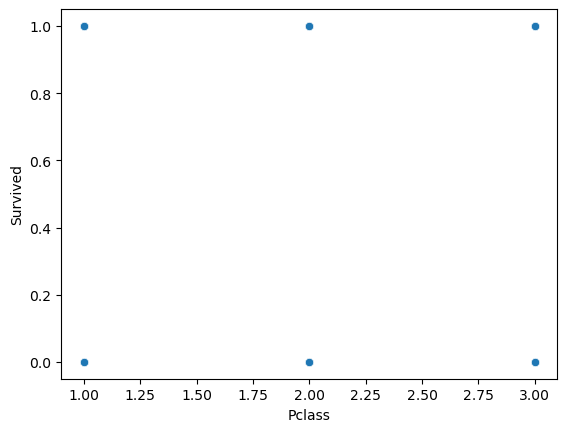

In [51]:
sns.scatterplot(x=train_data['Pclass'],y=train_data['Survived'])

<AxesSubplot:xlabel='Age', ylabel='Survived'>

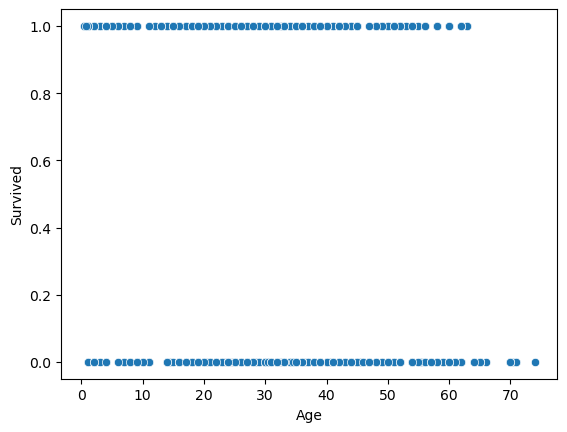

In [52]:
sns.scatterplot(x=train_data['Age'],y=train_data['Survived'])

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

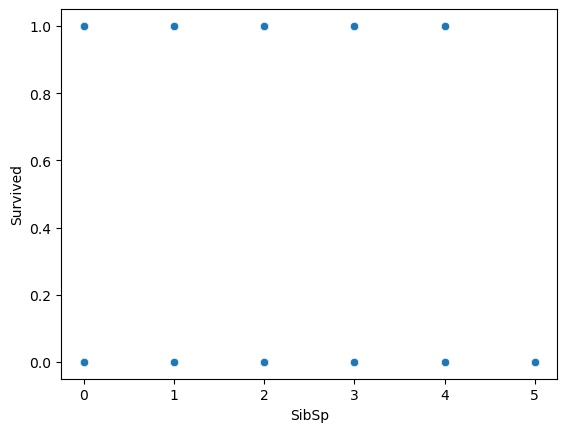

In [53]:
sns.scatterplot(x=train_data['SibSp'],y=train_data['Survived'])

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

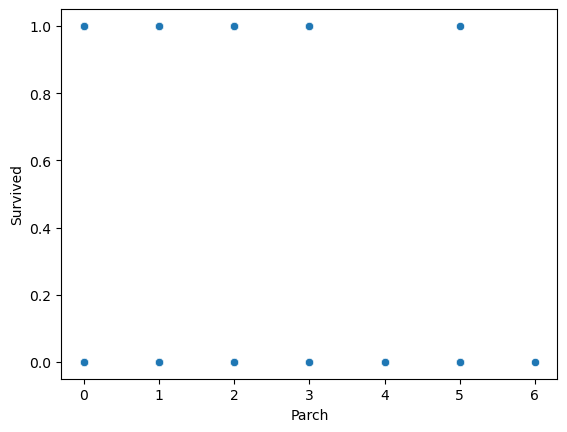

In [54]:
sns.scatterplot(x=train_data['Parch'],y=train_data['Survived'])

Inference: target var. Survived has 2 classes: class 0 and class 1 which can be easily identified in features: SibSp, Parch and Pclass

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

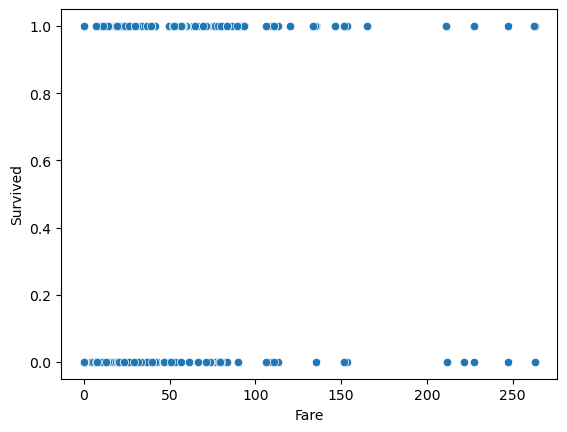

In [55]:
sns.scatterplot(x=train_data['Fare'],y=train_data['Survived'])

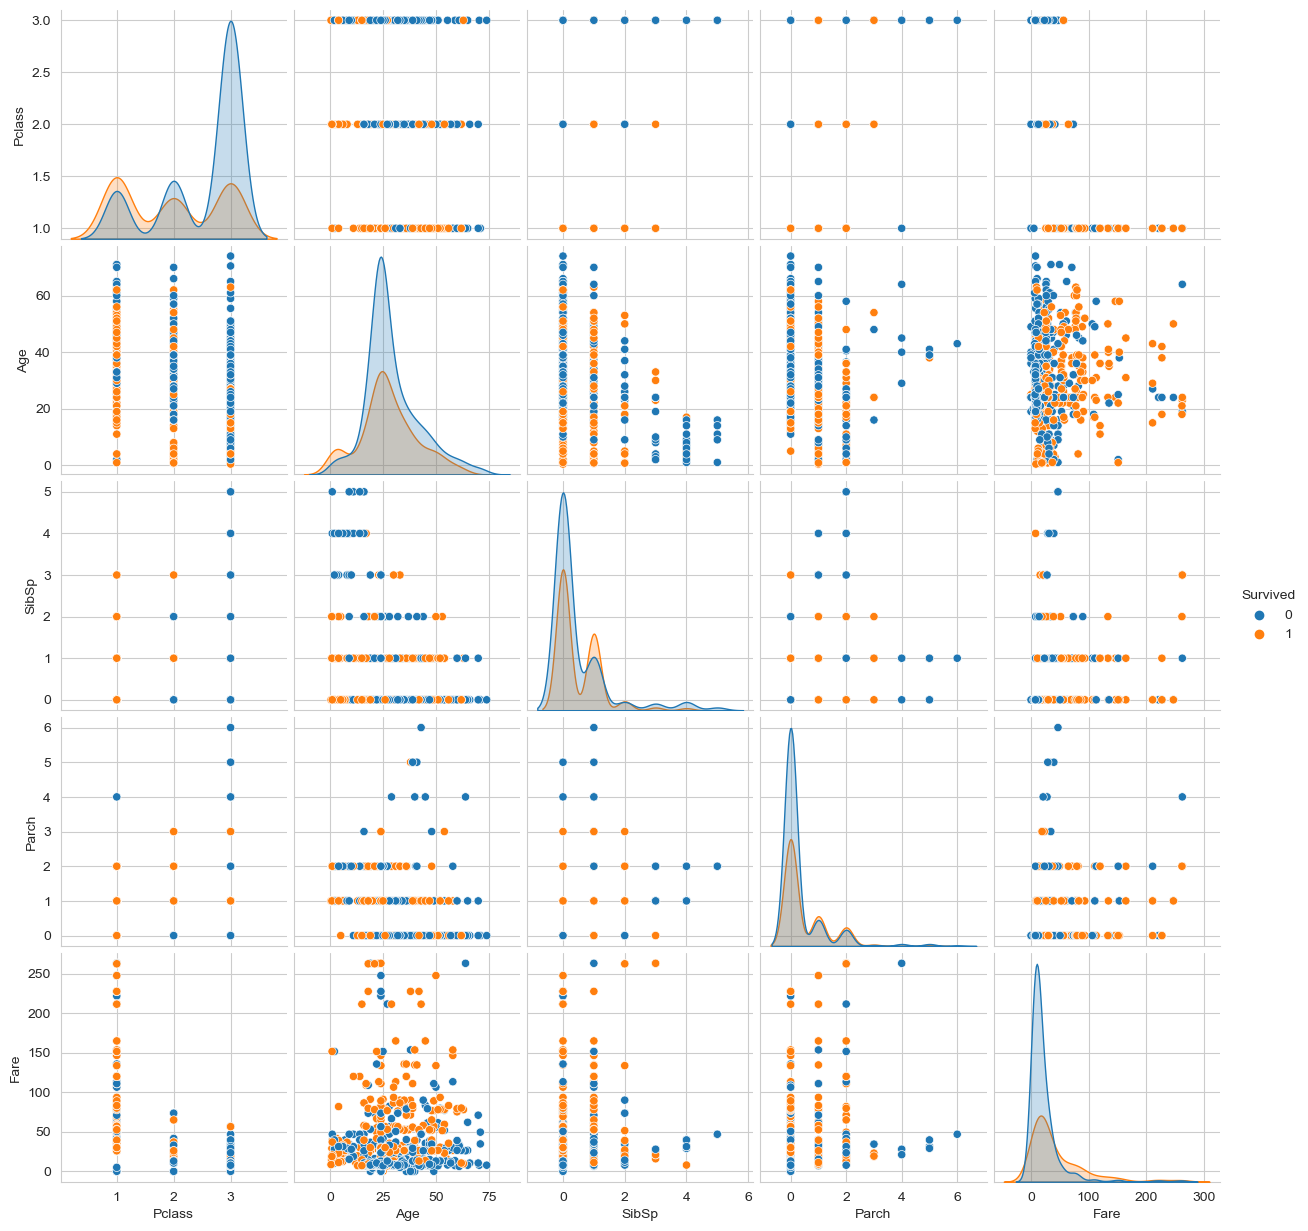

In [56]:
sns.set_style('whitegrid')
sns.pairplot(train_data,hue='Survived') # correlation between each pair of numerical features to visualise the distribution of target var. Survived
plt.show()

Inference: class 0 & class 1 can be easily identified between pairs: SibSp & Pclass and Parch & Pclass

# Bar plot

In [57]:
train_data.dtypes  #to identify categorical columns

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Braund, Mr. Owen Harris                     1
Leitch, Miss. Jessie Wills                  1
Taussig, Miss. Ruth                         1
Jarvis, Mr. John Denzil                     1
Frolicher-Stehli, Mr. Maxmillian            1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 880, dtype: int64

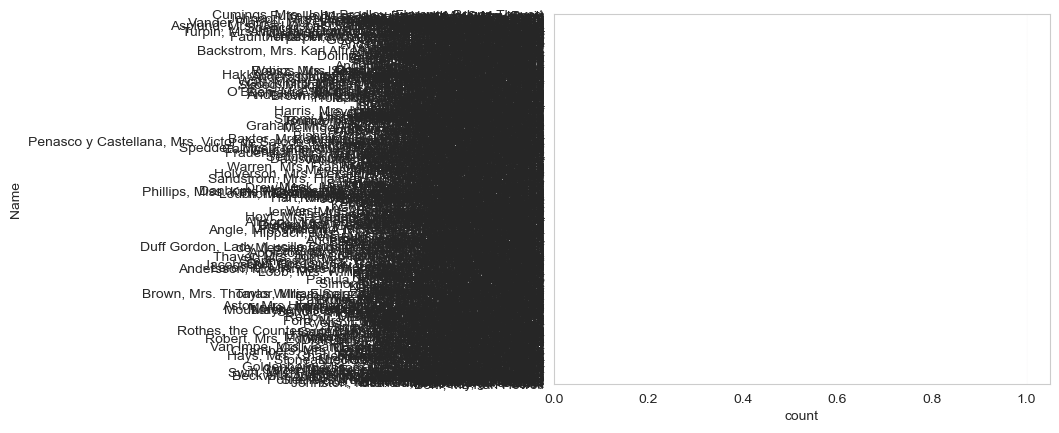

In [58]:
import seaborn as sns
sns.countplot(data=train_data,y=train_data['Name'])  # plot bar graph showing the count or frequency of each element in Name column
pd.value_counts(train_data['Name'])  # it will give exact number of times each element occuring in Name column

for getting clear visuals, we need to define the range of data to be displayed using order parameter inside countplot function

Braund, Mr. Owen Harris                     1
Leitch, Miss. Jessie Wills                  1
Taussig, Miss. Ruth                         1
Jarvis, Mr. John Denzil                     1
Frolicher-Stehli, Mr. Maxmillian            1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 880, dtype: int64

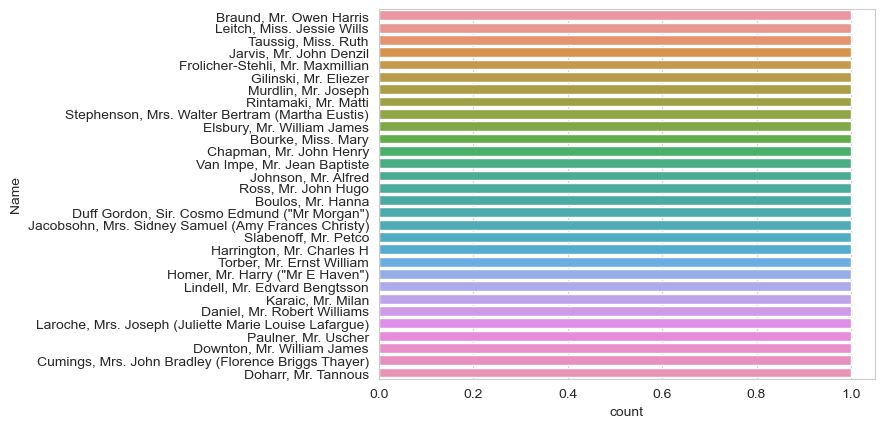

In [59]:
sns.countplot(data=train_data, y=train_data['Name'], order=pd.value_counts(train_data['Name']).iloc[:30].index) # plot bar graph showing the count of each element in Name column from row 1 to 29
pd.value_counts(train_data['Name'])  # it will give exact number of times each element occuring in Name column

male      570
female    310
Name: Sex, dtype: int64

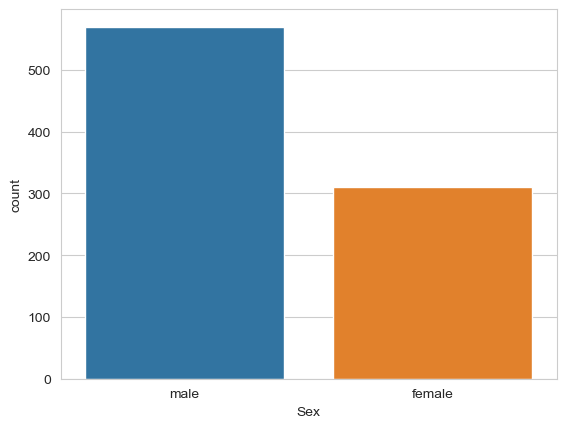

In [60]:
sns.countplot(data=train_data,x=train_data['Sex'])  # plot bar graph showing the count or frequency of each element in Sex column
pd.value_counts(train_data['Sex'])  # it will give exact number of times each element occuring in Sex column

insight of Sex column: no. of males are more than females almost double

1601        7
347082      7
3101295     6
CA 2144     6
347088      6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 678, dtype: int64

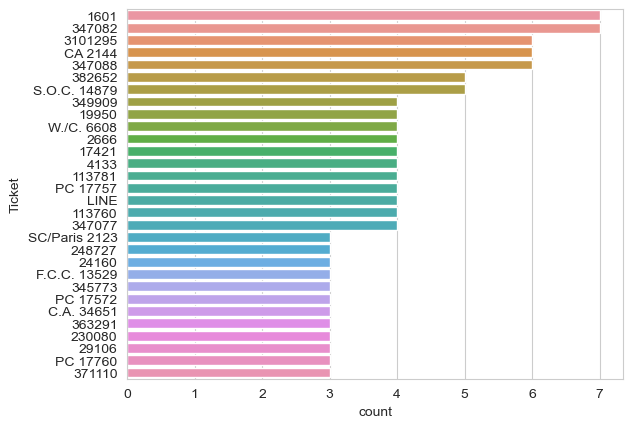

In [61]:
sns.countplot(data=train_data, y=train_data['Ticket'], order=pd.value_counts(train_data['Ticket']).iloc[:30].index) # plot bar graph showing the count of each element in Ticket column from row 1 to 29
pd.value_counts(train_data['Ticket'])  # it will give exact number of times each element occuring in Ticket column

B96 B98        683
G6               4
C23 C25 C27      4
F2               3
D                3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 145, dtype: int64

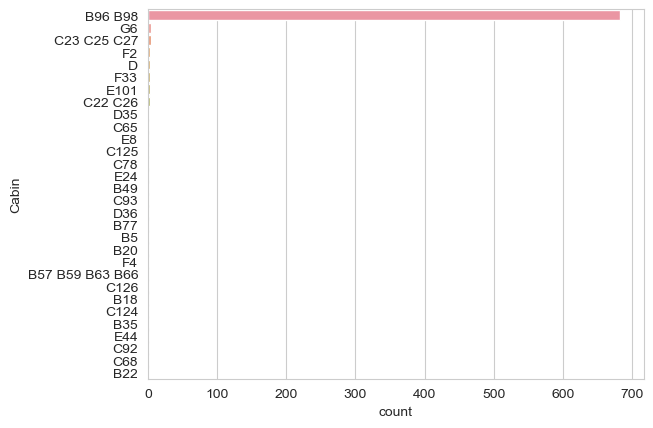

In [62]:
sns.countplot(data=train_data, y=train_data['Cabin'], order=pd.value_counts(train_data['Cabin']).iloc[:30].index) # plot bar graph showing the count of each element in Cabin column from row 1 to 29
pd.value_counts(train_data['Cabin'])  # it will give exact number of times each element occuring in Cabin column

S    638
C    165
Q     77
Name: Embarked, dtype: int64

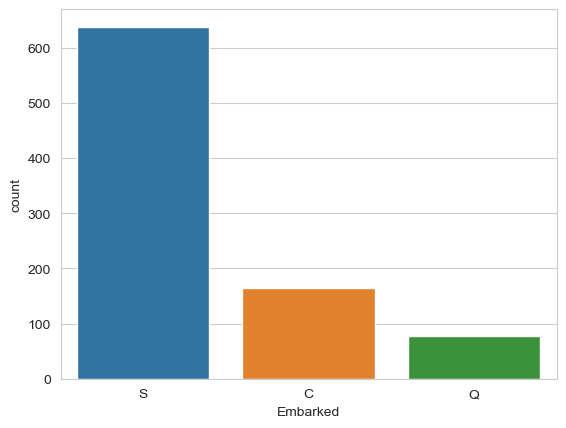

In [63]:
sns.countplot(data=train_data, x=train_data['Embarked']) # plot bar graph showing the count of each element in Embarked column 
pd.value_counts(train_data['Embarked'])  # it will give exact number of times each element occuring in Embarked column

# Let's apply heatmap over this training data to get the value of correlation between two variables

<AxesSubplot:>

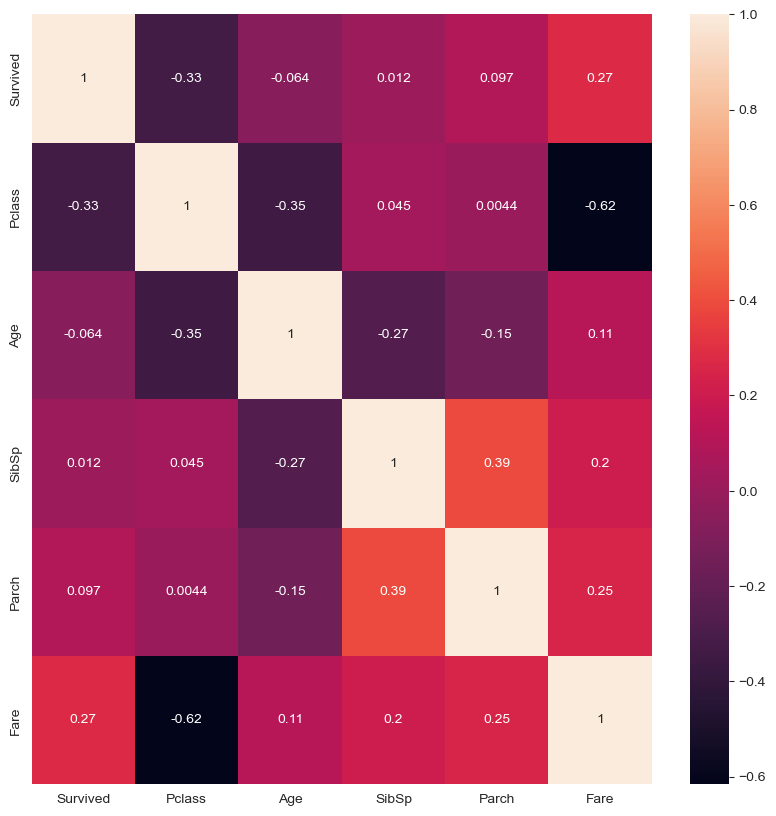

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))  #specify size of heatmap
sns.heatmap(train_data.corr(),annot=True) #create heatmap (parameter annot is used to display the correlation values, bidefault it is False, so, we have to pass True)

Fare is the most contributing element in deciding whether the passenger will survive or not because correlation value between Fare and Survived is 0.27 which is maximum value shown in this heatmap. Also, they have positive correlation (both variable varies in the same direction)

# Now, Let's visualize the testing data

In [65]:
test_data.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

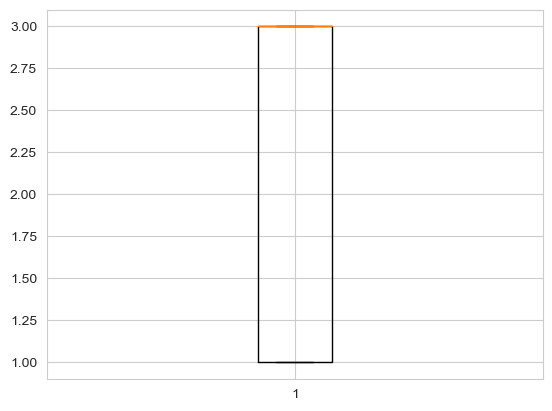

In [66]:
plt.boxplot(test_data['Pclass']) 
plt.show()

Range of Pclass: 1.00 - 3.00. Normally distributed data i.e. no outlier in the data. IQR(Inter Quartile Range) = 3.00 - 1.00 = 2.00

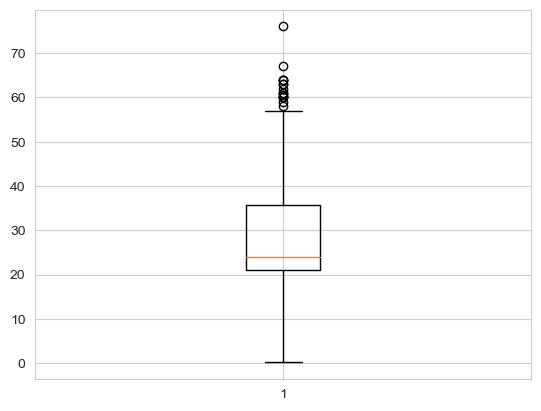

In [67]:
plt.boxplot(test_data['Age'])
plt.show()

Range of Age: 0-70. Right skewed data. IQR(Inter Quartile Range) = 35-20=15 (approx). Range from 55-70 is very dense, so, we should not consider them as outliers else we may lose some valuable information from the dataset. There is one value above 70 which is 100% outlier so, we can remove it from the dataset

# Treat outlier in column Age: only one point above 70

In [68]:
test_data.drop(test_data[test_data['Age'] > 70].index,axis=0,inplace=True) # remove one outlier above 70

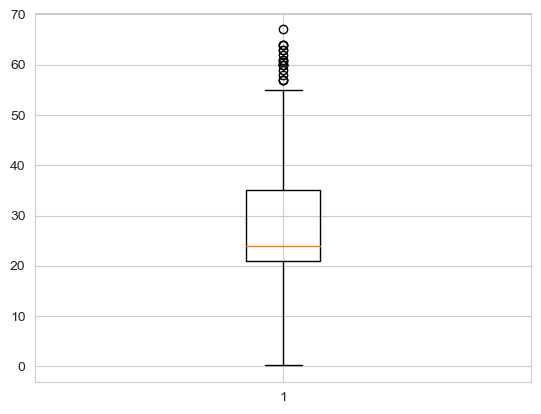

In [69]:
plt.boxplot(test_data['Age']) # one outlier above 70 has been removed now
plt.show()

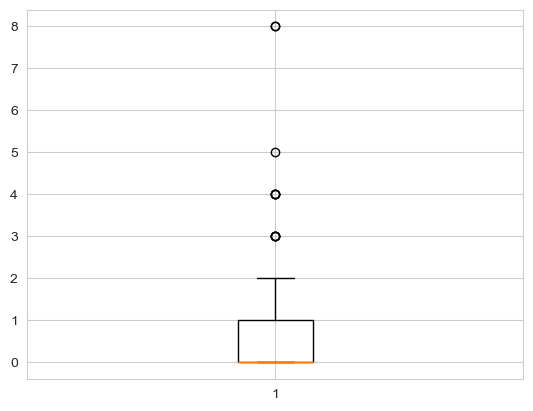

In [70]:
plt.boxplot(test_data['SibSp'])
plt.show()

Range of SibSp: 0-8. Right skewed data. IQR(Inter Quartile Range) = 1-0 = 1. Range from 3-5: 3 outliers but still they are relatively closer as compared to the one outlier at 8. So, we should remove outlier given at 8

# Treat outlier in column SibSp: only one point at 8

In [71]:
test_data.drop(test_data[test_data['SibSp'] > 7].index,axis=0,inplace=True) # remove one outlier above 7

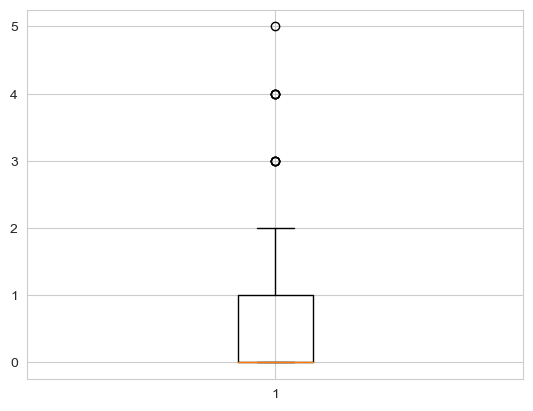

In [72]:
plt.boxplot(test_data['SibSp']) # one outlier above 7 has been removed now 
plt.show()

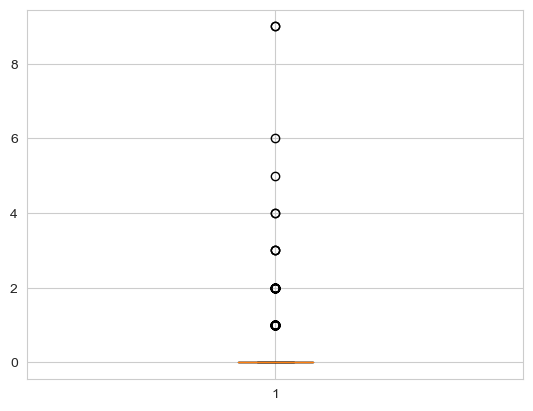

In [73]:
plt.boxplot(test_data['Parch'])
plt.show()

Range of Parch: 0-8. Right skewed data. IQR(Inter Quartile Range) = 0 . Range from 1-6: 6 outliers, however all these values can be possible, so, we are not considering them as outliers. However, one point above 8 is very extreme point and should be treated as outlier and hence must be removed from the dataset

# Treat outlier in column Parch: only one point above 8

In [74]:
test_data.drop(test_data[test_data['Parch'] > 8].index,axis=0,inplace=True) # remove one outlier above 8

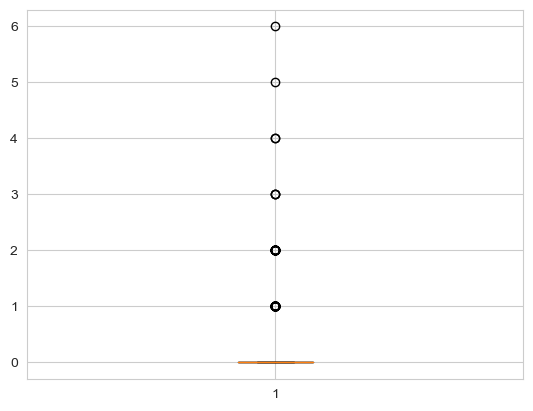

In [75]:
plt.boxplot(test_data['Parch'])  # one outlier above 8 has been removed now
plt.show()

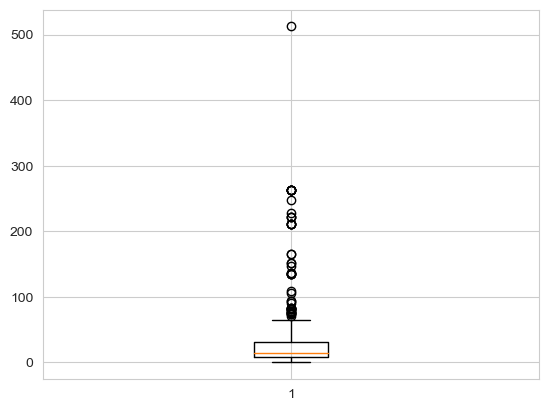

In [76]:
plt.boxplot(test_data['Fare'])
plt.show()

Range of Fare: 0-500. Right skewed data. IQR(Inter Quartile Range) = 1-0 = 1 (approx) . Range from 70-300 is very dense , so, can't be considered as outliers. There is one outlier above 500 which should be removed from the dataset

# Treat outlier in column Fare: only one point above 500

In [77]:
test_data.drop(test_data[test_data['Fare'] > 500].index,axis=0,inplace=True) # remove one outlier above 500

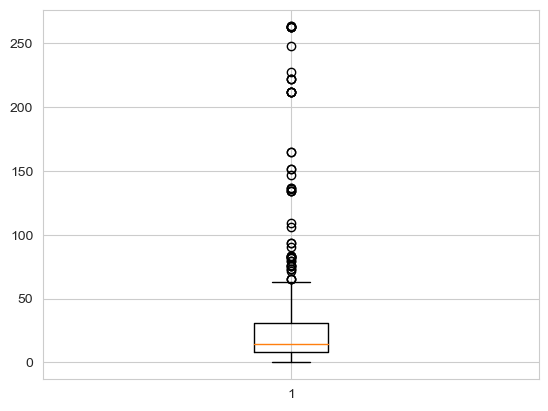

In [78]:
plt.boxplot(test_data['Fare']) # one outlier above 500 has been removed now 
plt.show()

# Encode categorical variables
Conversion of Categorical Data into Numerical data

In [79]:
train_data.dtypes  # Categorical Columns: Name, Sex, Ticket, Cabin, Embarked 

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [80]:
test_data.dtypes # Categorical Columns: Name, Sex, Ticket, Cabin, Embarked

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

ML algorithm can not run if there is a missing value, outliers, and categorical data in the dataset. Because Machine understands only numbers. So, we need to convert categorical data into numberical data and for this conversion, we have 2 techniques: dummy variable and label encoding.

# Let's convert categorical columns of training data into Numerical using Label Encoding

In [81]:
colname = ['Name','Sex','Ticket','Cabin','Embarked'] # list having only categorical columns

In [82]:
from sklearn.preprocessing import LabelEncoder # import LabelEncoder function from preprocessing sublibrary
le=LabelEncoder()                              # save LabelEncoder function in a variable le
for x in colname:                             # x can be any column like Name, Sex etc. 
    train_data[x]=le.fit_transform(train_data[x]) # it assigns numbers to all values of categorical column

In [83]:
train_data.head() #display top 5 rows 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,107,1,22.0,1,0,522,7.2500,45,2
2,1,1,188,0,38.0,1,0,594,71.2833,79,0
3,1,3,351,0,26.0,0,0,666,7.9250,45,2
4,1,1,270,0,35.0,1,0,49,53.1000,53,2
5,0,3,15,1,35.0,0,0,471,8.0500,45,2


# Let's convert categorical columns of testing data into Numerical using Label Encoding

In [84]:
from sklearn.preprocessing import LabelEncoder # import LabelEncoder function from preprocessing sublibrary
le=LabelEncoder()                              # save LabelEncoder function in a variable le
for x in colname:                             # x can be any column like Name, Sex etc. 
    test_data[x]=le.fit_transform(test_data[x]) # it assigns numbers to all values of categorical column

In [85]:
test_data.head() #display top 5 rows 

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,204,1,34.5,0,0,151,7.8292,14,1
893,3,397,0,47.0,1,0,220,7.0000,14,2
894,2,267,1,62.0,0,0,72,9.6875,14,1
895,3,402,1,27.0,0,0,146,8.6625,14,2
896,3,176,0,22.0,1,1,137,12.2875,14,2


# Build predictive model using LightGBM algorithm

We just need to run the ML algorithm(LightGBM) on past data (train_data) -> test our model performance on past data and then predict the list of passengers from the current data (test_data) who are survived or not .

In [86]:
X = train_data.iloc[:,1:] # define X (columns from Pclass to Embarked in training data)
Y = train_data.iloc[:,0]

In [87]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,107,1,22.0,1,0,522,7.2500,45,2
2,1,188,0,38.0,1,0,594,71.2833,79,0
3,3,351,0,26.0,0,0,666,7.9250,45,2
4,1,270,0,35.0,1,0,49,53.1000,53,2
5,3,15,1,35.0,0,0,471,8.0500,45,2
...,...,...,...,...,...,...,...,...,...,...
887,2,545,1,27.0,0,0,101,13.0000,45,2
888,1,301,0,19.0,0,0,14,30.0000,28,2
889,3,411,0,24.0,1,2,672,23.4500,45,2


In [88]:
Y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 880, dtype: int64

In [89]:
X.shape

(880, 10)

In [90]:
Y.shape

(880,)

# Data scaling on X using StandardScaler function
data scaling is needed in X because few columns have higher numeric values as compared to other columns which means that our model may get bias towards columns with higher numeric values. So, to avoid this scenario, data scaling is very useful here. In data scaling, we scale the data in such a way so that values of each and every column will be in the range of -3 to +3. We will scale our data using StandardScaler function which is available inside preprocessing sublibrary

In [91]:
from sklearn.preprocessing import StandardScaler # import StandardScaler func from preprocessing sublibrary
scaler = StandardScaler()     # StandardScaler func saved in var. scaler
scaler.fit(X)       # apply StandardScaler on X
X = scaler.transform(X)  # it will transform all values of X into the predefined range of -3 to +3 and again saved in var. X

In [92]:
X

array([[ 0.82853782, -1.30888015,  0.73746841, ..., -0.55891169,
        -0.29061367,  0.58568063],
       [-1.56986114, -0.99002513, -1.35599029, ...,  0.99558539,
         1.15328555, -1.94699236],
       [ 0.82853782, -0.34837863, -1.35599029, ..., -0.54252513,
        -0.29061367,  0.58568063],
       ...,
       [ 0.82853782, -0.11218973, -1.35599029, ..., -0.16563424,
        -0.29061367,  0.58568063],
       [-1.56986114, -1.41516515,  0.73746841, ..., -0.00662391,
         0.26146544, -1.94699236],
       [ 0.82853782, -0.87193069,  0.73746841, ..., -0.54677349,
        -0.29061367, -0.68065587]])

# split X and Y into 2 parts to get training and testing data.
80% training, 20% testing => means parameter test_size = 0.2

In [93]:
from sklearn.model_selection import train_test_split # import train_test_split func from model_selection sublib.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10) # training and testing data (model can randomly take 10 rows at a time)

In [94]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(704, 10)
(176, 10)
(704,)
(176,)


In [95]:
import lightgbm as lgb

In [96]:
model = lgb.LGBMClassifier()   # create a classifier
model.fit(X_train,Y_train)   # fit function will train the model 

[LightGBM] [Info] Number of positive: 266, number of negative: 438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 704, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377841 -> initscore=-0.498723
[LightGBM] [Info] Start training from score -0.498723
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier()

In [97]:
model.score(X_train,Y_train), model.score(X_test,Y_test)  # training accuracy, testing accuracy

(0.9985795454545454, 0.8636363636363636)

Model is generalised, we can use it for further predictions. 

In [98]:
Y_pred = model.predict(X_test)   # predict class of Y for given X_test
print(Y_pred)

[0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0]


Here, we predict two class of Y for a given testing data. These are: 0 and 1

0 means passenger will not survive

1 means passenger will survive

In [99]:
print(list(zip(Y_test,Y_pred))) #compare predicted class of Y with actual class of Y

[(0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 0), (0, 1), (1, 0), (0, 0), (1, 1), (1, 0), (1, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1),

# Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred) #confusion matrix
print(cfm)
print("classification report")
print(classification_report(Y_test,Y_pred))  # classification report
acc = accuracy_score(Y_test,Y_pred)   # accuracy of the model
print("accuracy of model:",acc)

[[96  8]
 [16 56]]
classification report
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       104
           1       0.88      0.78      0.82        72

    accuracy                           0.86       176
   macro avg       0.87      0.85      0.86       176
weighted avg       0.86      0.86      0.86       176

accuracy of model: 0.8636363636363636


Confusion matrix is a matrix which represents the summary of the prediction results on a classification problem. 

recall is the accuracy of individual class.

For class 0, recall = 0.92

For class 1, recall = 0.78

It means, for class 0 model is predicting 92% of the things correctly but for class 1 model is predicting 78% of the things correctly.

Precision means percentage of True positive predictions among all positive predictions made by the model. It is calculated as the ratio of TP to the sum of TP and false positives (FP).

F1 Score is a metric that balances precision and recall. It is calculated as the mean of precision and recall.

# Let's predict the list of passengers from the current data(test_data), who survive or not

In [101]:
X_test_new = test_data.values[:,:]  # all rows, all columns

In [102]:
X_test_new

array([[  3.    , 204.    ,   1.    , ...,   7.8292,  14.    ,   1.    ],
       [  3.    , 397.    ,   0.    , ...,   7.    ,  14.    ,   2.    ],
       [  2.    , 267.    ,   1.    , ...,   9.6875,  14.    ,   1.    ],
       ...,
       [  3.    , 330.    ,   1.    , ...,   7.25  ,  14.    ,   2.    ],
       [  3.    , 378.    ,   1.    , ...,   8.05  ,  14.    ,   2.    ],
       [  3.    , 300.    ,   1.    , ...,  22.3583,  14.    ,   0.    ]])

In [103]:
X_test_new.shape

(412, 10)

In [104]:
# data scaling of X_test_new
from sklearn.preprocessing import StandardScaler # import StandardScaler func from preprocessing sublibrary
scaler = StandardScaler()     # StandardScaler func saved in var. scaler
scaler.fit(X_test_new)       # apply StandardScaler on X_test_new
X_test_new = scaler.transform(X_test_new)  # it will transform all values of X_test_new into the predefined range of -3 to +3 and again saved in var. X_test_new

In [105]:
X_test_new  # it's testing data from my current data(test_data)

array([[ 0.87634132, -0.01261206,  0.74873631, ..., -0.51532493,
        -0.35454335, -0.46592413],
       [ 0.87634132,  1.61013935, -1.33558369, ..., -0.53163021,
        -0.35454335,  0.7045682 ],
       [-0.3152515 ,  0.51709436,  0.74873631, ..., -0.47878356,
        -0.35454335, -0.46592413],
       ...,
       [ 0.87634132,  1.04680078,  0.74873631, ..., -0.52671424,
        -0.35454335,  0.7045682 ],
       [ 0.87634132,  1.45038662,  0.74873631, ..., -0.51098315,
        -0.35454335,  0.7045682 ],
       [ 0.87634132,  0.79455963,  0.74873631, ..., -0.22962658,
        -0.35454335, -1.63641647]])

In [106]:
Y_pred_new = model.predict(X_test_new)
Y_pred_new

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,

The above list of passengers are from the current data(test_data), who survive or not

0: indicates passenger not survive

1: indicates passenger survive

# Cross validation (also known as K-Fold)

In [107]:
from sklearn.model_selection import KFold
kfold_cv = KFold(n_splits=10,random_state=42,shuffle=True)

In [108]:
kfold_cv

KFold(n_splits=10, random_state=42, shuffle=True)

In [109]:
from sklearn.model_selection import cross_val_score
kold_cv_result = cross_val_score(estimator=model, X=X_train,y=Y_train,cv=kfold_cv)

[LightGBM] [Info] Number of positive: 239, number of negative: 394
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 633, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377567 -> initscore=-0.499887
[LightGBM] [Info] Start training from score -0.499887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [110]:
print(kold_cv_result)  # 10 accuracy scores

[0.83098592 0.84507042 0.77464789 0.74647887 0.82857143 0.75714286
 0.88571429 0.82857143 0.81428571 0.77142857]


In [111]:
print(kold_cv_result.mean()) # mean of accuracy scores

0.8082897384305834


accuracy of LightGBM model: 0.86 whereas accuracy of model created by K-Fold is 0.81 which is almost similar, so, from K-Fold validation test, we can conclude that LightGBM model is neither overfitting nor underfitting the data. Hence, LightGBM model is performing good 

# hyperparameter tuning to optimize LightGBM model 

In [112]:
model = lgb.LGBMClassifier(num_leaves=120, random_state=42)   # create a classifier
model.fit(X_train,Y_train)   # fit function will train the model 

[LightGBM] [Info] Number of positive: 266, number of negative: 438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 704, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377841 -> initscore=-0.498723
[LightGBM] [Info] Start training from score -0.498723
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier(num_leaves=120, random_state=42)

In [113]:
model.score(X_train,Y_train), model.score(X_test,Y_test)  # training accuracy, testing accuracy

(0.9971590909090909, 0.8579545454545454)

In [114]:
model = lgb.LGBMClassifier(num_leaves=120, max_depth=5, random_state=42)   # create a classifier
model.fit(X_train,Y_train)   # fit function will train the model 

[LightGBM] [Info] Number of positive: 266, number of negative: 438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 704, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377841 -> initscore=-0.498723
[LightGBM] [Info] Start training from score -0.498723
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMClassifier(max_depth=5, num_leaves=120, random_state=42)

In [115]:
model.score(X_train,Y_train), model.score(X_test,Y_test)  # training accuracy, testing accuracy

(0.9332386363636364, 0.8636363636363636)

In [116]:
model = lgb.LGBMClassifier(num_leaves=120, max_depth=5, learning_rate=0.1,random_state=42)   # create a classifier
model.fit(X_train,Y_train)   # fit function will train the model 

[LightGBM] [Info] Number of positive: 266, number of negative: 438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 704, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377841 -> initscore=-0.498723
[LightGBM] [Info] Start training from score -0.498723
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier(max_depth=5, num_leaves=120, random_state=42)

In [117]:
model.score(X_train,Y_train), model.score(X_test,Y_test)  # training accuracy, testing accuracy

(0.9332386363636364, 0.8636363636363636)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

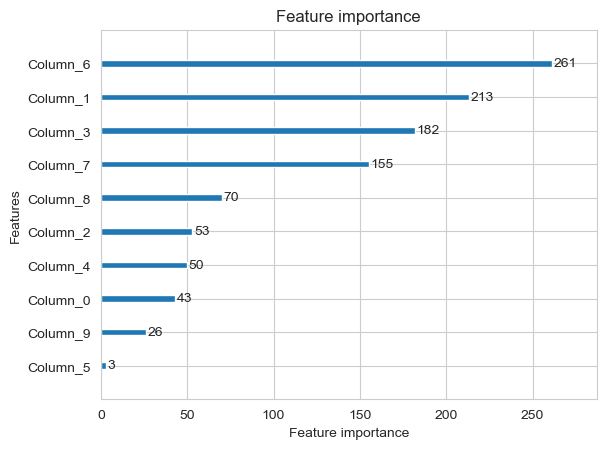

In [118]:
lgb.plot_importance(model) # plot various features of LGBM model

column_6 & Column_1 (Ticket & Name) are the most important features in deciding whether passenger survive or not  

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

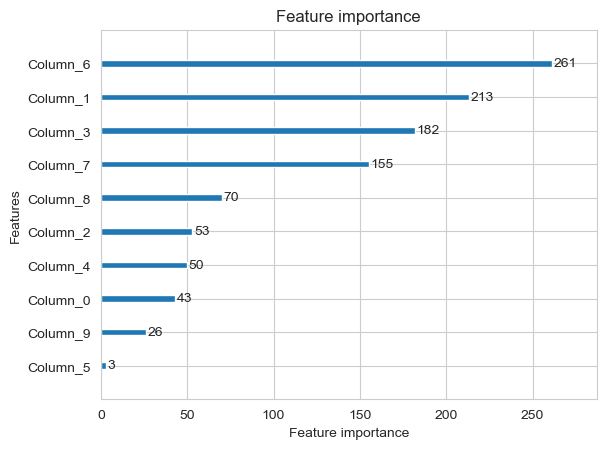

In [119]:
lgb.plot_importance(model,importance_type='split') 

# Build predictive model using XGBoost algorithm

In [120]:
import xgboost as xgb

In [121]:
model_clf = xgb.XGBClassifier(n_estimators =100, random_state=42)  # create a classifier
model_clf.fit(X_train,Y_train)   # fit function will train the model 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [122]:
model_clf.score(X_train,Y_train), model_clf.score(X_test,Y_test)  # training accuracy, testing accuracy

(1.0, 0.8636363636363636)

model is generalised for further predictions

In [123]:
Y_pred = model_clf.predict(X_test)   # predict class of Y for given X_test
print(Y_pred)

[0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0]


# Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score

In [124]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred) #confusion matrix
print(cfm)
print("classification report")
print(classification_report(Y_test,Y_pred))  # classification report
acc = accuracy_score(Y_test,Y_pred)   # accuracy of the model
print("accuracy of model:",acc)

[[95  9]
 [15 57]]
classification report
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       104
           1       0.86      0.79      0.83        72

    accuracy                           0.86       176
   macro avg       0.86      0.85      0.86       176
weighted avg       0.86      0.86      0.86       176

accuracy of model: 0.8636363636363636


# Let's predict the list of passengers from the current data(test_data), who survive or not

In [125]:
Y_pred_new = model_clf.predict(X_test_new)
Y_pred_new

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

# Cross validation (also known as K-Fold)

In [126]:
from sklearn.model_selection import KFold
kfold_cv = KFold(n_splits=10,random_state=42,shuffle=True)

In [127]:
from sklearn.model_selection import cross_val_score
kold_cv_result = cross_val_score(estimator=model_clf, X=X_train,y=Y_train,cv=kfold_cv)

In [128]:
print(kold_cv_result)  # 10 accuracy scores

[0.83098592 0.81690141 0.77464789 0.74647887 0.84285714 0.77142857
 0.87142857 0.85714286 0.77142857 0.77142857]


In [129]:
print(kold_cv_result.mean()) # mean of accuracy scores

0.8054728370221328


accuracy of XGBoost model: 0.86 whereas accuracy of model created by K-Fold is 0.80 which is almost similar, so, from K-Fold validation test, we can conclude that XGBoost model is neither overfitting nor underfitting the data. Hence, XGBoost model is performing good 

# hyperparameter tuning to optimize XGBoost model

In [130]:
model_clf = xgb.XGBClassifier(n_estimators =100,max_depth=None, random_state=42)    # create a classifier
model_clf.fit(X_train,Y_train)   # fit function will train the model 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [131]:
model_clf.score(X_train,Y_train), model_clf.score(X_test,Y_test)  # training accuracy, testing accuracy

(1.0, 0.8636363636363636)

In [132]:
model_clf = xgb.XGBClassifier(n_estimators =100,max_depth=None,learning_rate=0.5, random_state=42)    # create a classifier
model_clf.fit(X_train,Y_train)   # fit function will train the model 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [133]:
model_clf.score(X_train,Y_train), model_clf.score(X_test,Y_test)  # training accuracy, testing accuracy

(1.0, 0.8636363636363636)

In [134]:
model_clf = xgb.XGBClassifier(n_estimators =100,max_depth=None,learning_rate=0.6, random_state=42)    # create a classifier
model_clf.fit(X_train,Y_train)   # fit function will train the model 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [135]:
model_clf.score(X_train,Y_train), model_clf.score(X_test,Y_test)  # training accuracy, testing accuracy

(1.0, 0.875)

Model is more generalised and better than previous model

In [136]:
Y_pred = model_clf.predict(X_test)
print(Y_pred)

[0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0]


In [137]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred) #confusion matrix
print(cfm)
print("classification report")
print(classification_report(Y_test,Y_pred))  # classification report
acc = accuracy_score(Y_test,Y_pred)   # accuracy of the model
print("accuracy of model:",acc)

[[96  8]
 [14 58]]
classification report
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       104
           1       0.88      0.81      0.84        72

    accuracy                           0.88       176
   macro avg       0.88      0.86      0.87       176
weighted avg       0.88      0.88      0.87       176

accuracy of model: 0.875


# Let's predict the list of passengers from the current data(test_data), who survive or not

In [138]:
Y_pred_new = model_clf.predict(X_test_new)
print(Y_pred_new)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1
 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1
 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0
 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1
 0 1 0 0 0]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

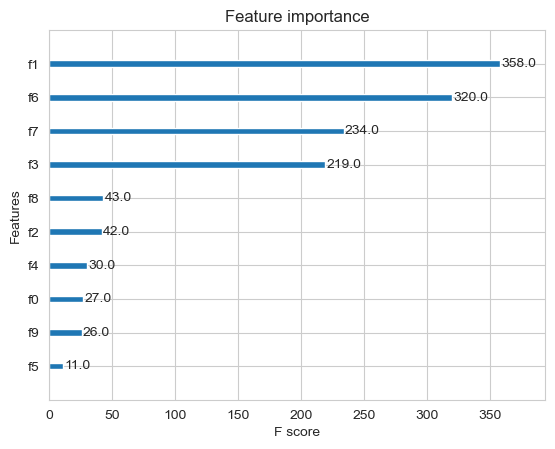

In [139]:
xgb.plot_importance(model_clf) # plot features of XGBoost model

f1 & f6 (Name & Ticket) are the most important features in deciding whether passenger survive or not

# Comparative Analysis:

# Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

              XGBoost model:                     

                               precision    recall  f1-score   support

                           0       0.87      0.92      0.90       104
                           
                           1       0.88      0.81      0.84        72

                     accuracy                           0.88       176
  
                    macro avg       0.88      0.86      0.87       176

                  weighted avg       0.88      0.88      0.87       176

                  accuracy of model: 0.875


 
              LightGBM model: 

                               precision    recall  f1-score   support

                          0       0.86      0.92      0.89       104
                          
                          1       0.88      0.78      0.82        72

    
                   accuracy                           0.86       176
    
                    macro avg       0.87      0.85      0.86       176
   
                  weighted avg       0.86      0.86      0.86       176

                  accuracy of model: 0.8636363636363636


# Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.


Speed and Efficiency: LightGBM can train much faster, using less memory. This makes it better suited for large datasets. XGBoost may perform slower but has optimizations for small-to-medium datasets. Accuracy: Both can achieve state-of-the-art accuracy.


# A brief report summarizing the comparative analysis results and practical implications.

XGBoost implements disk-based tree learning and in-memory prediction for better memory management. But LightGBM has the edge for lower memory usage overall. For applications where memory is a key constraint like cloud deployments or edge devices, LightGBM is likely the better choice over XGBoost

LightGBM is an ensemble learning framework, specifically a gradient boosting method, which constructs a strong learner by sequentially adding weak learners in a gradient descent manner. It optimizes memory usage and training time with techniques like Gradient-based One-Side Sampling (GOSS).


You can use XGBoost for classification, regression, ranking, and even user-defined prediction challenges! You can also use this library with other tools Scikit-Learn if you want to get more out of your model-building process